# *A2: Machine Learning with Python*

### Hult International Business School
#### Introduction to Machine Learning & AI
#### Dr. Michael de la Maza

#### Team 11

#### 03.25.2024

<hr style="height: 4px; background-color: #2B547E;">

**Executive Summary**

<p align="justify">In our quest to predict student graduation or dropout rates, we employed a comprehensive approach that began with feature selection, using Recursive Feature Elimination to identify the most impactful features, such as 'Gender' and 'Curricular units 2nd sem (approved)'. This process was instrumental in reducing overfitting and enhancing model generalization. Furthermore, we applied feature scaling with MinMaxScaler to ensure a balanced contribution from all variables, which is crucial for models sensitive to input scales. Hyperparameter tuning, especially critical for complex models like XGBOOST and MLP Classifier, was conducted through a systematic combination of grid search and StratifiedKFold cross-validation to optimize model performance. Additionally, ensemble methods like AdaBoost and Bagging Classifier were utilized, leveraging the strength of multiple weak learners to improve prediction accuracy by mitigating variance and bias.</p>


<p align="justify">The selection of the machine learning algorithm was a meticulous process. We began with simpler models like Logistic Regression to establish a baseline and then explored more sophisticated models, assessing improvements in accuracy. The Decision Tree algorithm emerged as the most suitable choice, adept at handling our dataset's diverse and complex nature, which included socio-economic indicators and academic performance metrics. Its simplicity and interpretability were critical assets in the educational context, making the algorithm accessible to all stakeholders. The robustness of Decision Trees to outliers and non-linear relationships, demonstrated by solid performance metrics (Best Score: 0.9293, Accuracy: 0.8939), further cemented its suitability. The Decision Tree's balance of adaptability, ease of understanding, and effectiveness in identifying critical factors influencing student outcomes made it an ideal model for our purpose, playing a crucial role in academic planning and intervention strategies.</p>

**Introduction**

<p align="justify">This Python notebook explores utilizing a selected UCI Machine Learning Repository dataset that meets specific size and feature count criteria. We focus on identifying and justifying the most effective classification algorithm to maximize accuracy. We also implemented a machine learning algorithm with the highest possible classification accuracy for predicting whether students will graduate or drop out. This task is crucial for educational institutions to intervene early and provide support where necessary. It includes detailed sections on dataset overview, algorithm selection, exploratory data analysis, data preprocessing, feature selection, model training, and hyperparameter tuning, accompanied by clear explanations and justifications. Tailored to run seamlessly in Colab with a comprehensive approach, this notebook aims to achieve high accuracy and provides an insightful and educational journey through machine learning classification techniques.</p>

**Selection of the Classification Algorithm**

<p align="justify">In our quest to select the most appropriate classification algorithm, we started with a comprehensive dataset capturing various aspects of students' academic and personal backgrounds. This dataset included features like marital status, course choice, previous qualifications, grades, and socio-economic indicators.</p>

<p align="justify">Our selection process began with exploratory data analysis (EDA)* to understand the data's characteristics, followed by preprocessing steps to prepare the data for modeling. Given the nature of our target variable – predicting a binary outcome (graduate or dropout)—we evaluated several classification algorithms, including Logistic Regression, Decision Trees, AdaBoost, Bagging Classifier, xgboost, and MLP Classifier.</p>

<p align="justify">Our logic was straightforward: start with simpler models to establish a baseline and gradually move towards more complex models to see if we can improve accuracy. Logistic regression was chosen as a starting point due to its simplicity, interpretability, and efficiency in binary classification problems.</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
file_path = '/content/data.csv'
df = pd.read_csv(file_path, delimiter=';')
pd.set_option('display.max_columns', None)
df.head(8)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout


**Explanation of the Python Notebook**

<p align="justify">The Python notebook is structured to take the reader through the entire machine learning workflow, starting with Understanding Data and Data Description, where we delve into the dataset's specifics and explore the variables at hand.<p>

**EDA**

<p align="justify">In the EDA section, we visualize and analyze the data to uncover any patterns, trends, or anomalies. This step is crucial for informed feature engineering and preprocessing decisions.</p>

**Data Preprocessing**

<p align="justify"> It includes cleaning the data, handling missing values, encoding categorical variables, and feature scaling. This ensures that our models receive clean and standardized input.</p>

**Feature Selection**

<p align="justify"> It is where we use techniques like Recursive Feature Elimination (RFE) to identify the most impactful features for our prediction task. It helps us focus on the information most relevant to our target variable.</p>

**Modeling section**

<p align="justify"> This is the heart of our notebook, where we iteratively train and evaluate different models, starting from Logistic Regression to more sophisticated ones like XGBOOST. Each model's choice is justified by its suitability for our data and the problem at hand.</p>

**A. Understanding Data**

In [ ]:
print (df.shape)

(4424, 37)


In [ ]:
# Data types of attributes
print (df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

**B. Data Description**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
# Check missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
df = df.rename(columns={'Nacionality': 'Nationality'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
print('The number of duplicated Record in the student\'s dataset is', df.duplicated().sum())

The number of duplicated Record in the student's dataset is 0


**C. EDA**

The graph compares student outcomes across three categories: Dropout, Graduate, and Enrolled. The percentage of students who graduate ishigher at 49.9% compared to the dropout rate of 32.1% and the enrolled rate of 17.9%.

In [ ]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

<ipython-input-11-d4659c5111e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Target", data=df, palette='husl')


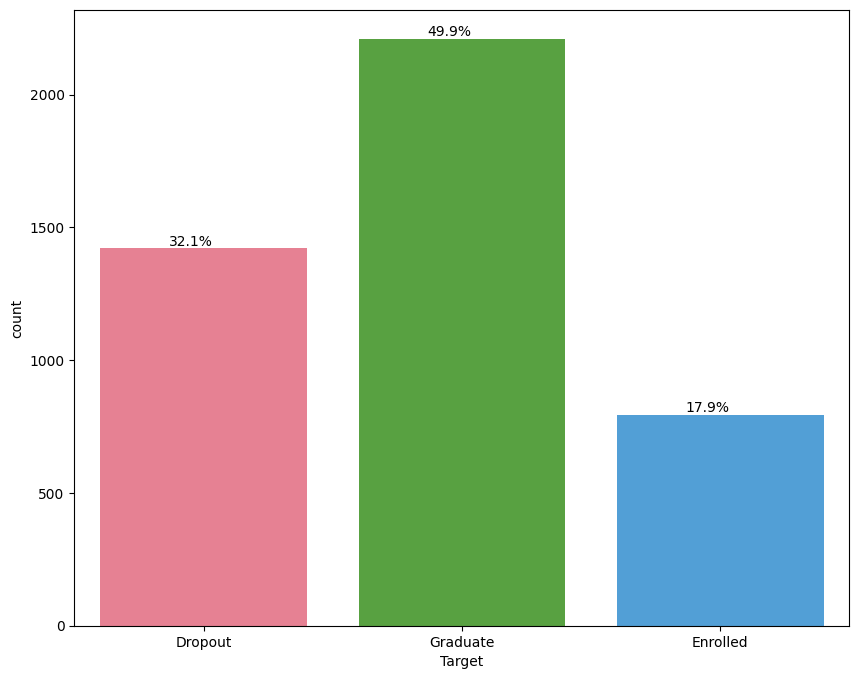

In [ ]:
#　visualize the target variable
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="Target", data=df, palette='husl')

total = len(df["Target"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

**D. Data Preprocessing**

Since we want to predict whether a student will graduate or drop out, data on students who are still in school are not needed for this analysis.

In [ ]:
# remove enrolled from the data
df = df[df.Target != 'Enrolled']

In [ ]:
df.shape

(3630, 37)

In [ ]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

<ipython-input-15-d4659c5111e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Target", data=df, palette='husl')


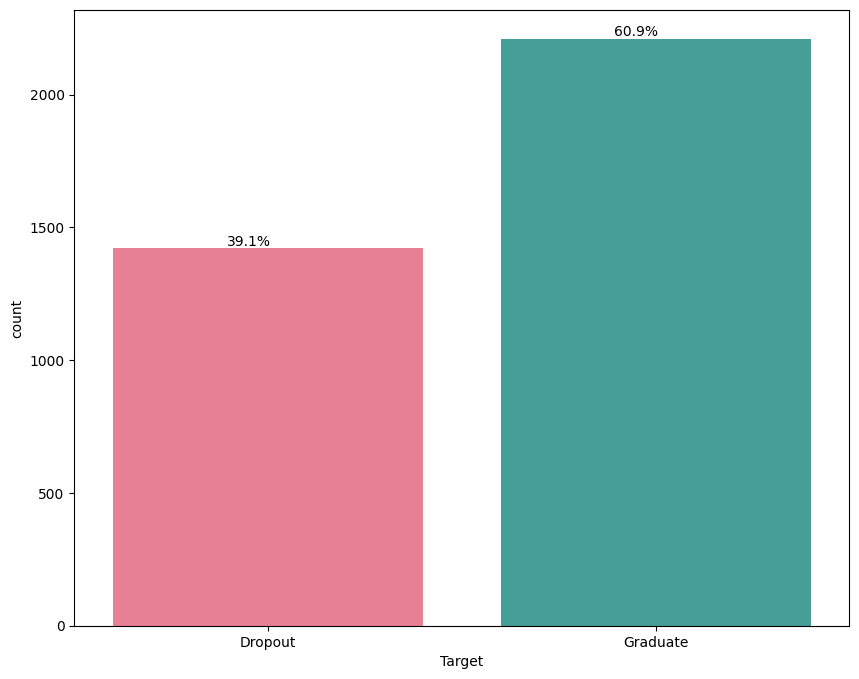

In [ ]:
#　visualize the target variable
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="Target", data=df, palette='husl')

total = len(df["Target"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

The bar graph compares the dropout and graduation rates for a given target group. The graduation rate of 60.9% is significantly higher than the dropout rate of 39.1%, indicating that more individuals in the target group successfully complete their program than those who leave prematurely.

**Improving the Accuracy**

Improving the model's accuracy was a iterative process that involved several strategies. First, **Feature selection** helped us remove irrelevant or redundant features, reducing the risk of overfitting and improving model generalization.

We then employed **Feature Scaling** to ensure that all variables contributed equally to the model's predictions, eliminating bias towards high-magnitude features.

**Hyperparameter Tuning** was another critical step, especially for complex models like XGBOOST and MLP Classifier. By fine-tuning the models' parameters, we could significantly enhance their performance.

Lastly, we explored ensemble methods like AdaBoost and Bagging Classifier, which combine multiple weak learners to form a strong predictor. These methods helped improve prediction accuracy by reducing variance and bias.

**A. Future Selection**

*The code divides the features and target variables and uses a logistic regression model to select the top 10 features. The resulting output is a ranking of each feature. The features with a ranking of 1 are the most important top 10 features.*

<p align="justify">This code uses a process called "Recursive Feature Elimination" (RFE). This is a method of determining what is most important among many different pieces of information (features). For example, it is like choosing the most important area of study for a school test. In this case, the program uses the data (X and y) to select the 10 most important pieces of information, where X contains many columns (information) and y contains the results you want to predict (e.g., test scores). The program uses these to learn which information will have the greatest impact on the outcome. The program then ranks each piece of information. Those with a ranking of 1 are the most important, and as the number increases, the importance decreases. In the results of this code, information such as 'Gender' and 'Curricular units 2nd sem (approved)' have a ranking of 1 and are determined to be the most influential. Those with higher numbers, e.g. 'Course', are ranked 27 and are considered less important. This information can be used by teachers and schools to come up with better teaching methods and to help students get better scores on tests.</p>

In [ ]:
# Assume the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Create a logistic regression classifier
model = LogisticRegression(solver='liblinear')

# Create the RFE model and select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Feature Ranking:")
print(feature_ranking.sort_values(by='Ranking'))

Feature Ranking:
                                           Feature  Ranking
17                                          Gender        1
30             Curricular units 2nd sem (approved)        1
28             Curricular units 2nd sem (enrolled)        1
24             Curricular units 1st sem (approved)        1
21             Curricular units 1st sem (credited)        1
20                                   International        1
18                              Scholarship holder        1
16                         Tuition fees up to date        1
15                                          Debtor        1
14                       Educational special needs        1
26  Curricular units 1st sem (without evaluations)        2
22             Curricular units 1st sem (enrolled)        3
13                                       Displaced        4
32  Curricular units 2nd sem (without evaluations)        5
0                                   Marital status        6
27             Curricul

In [ ]:
# Future Ranking data
Future_Ranking_data = df[['Gender',
                    'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (enrolled)',
                    'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (credited)',
                    'International',
                    'Scholarship holder',
                    'Tuition fees up to date',
                    'Debtor',
                    'Educational special needs','Target']]

<ipython-input-18-3ddb235ca086>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Future_Ranking_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')


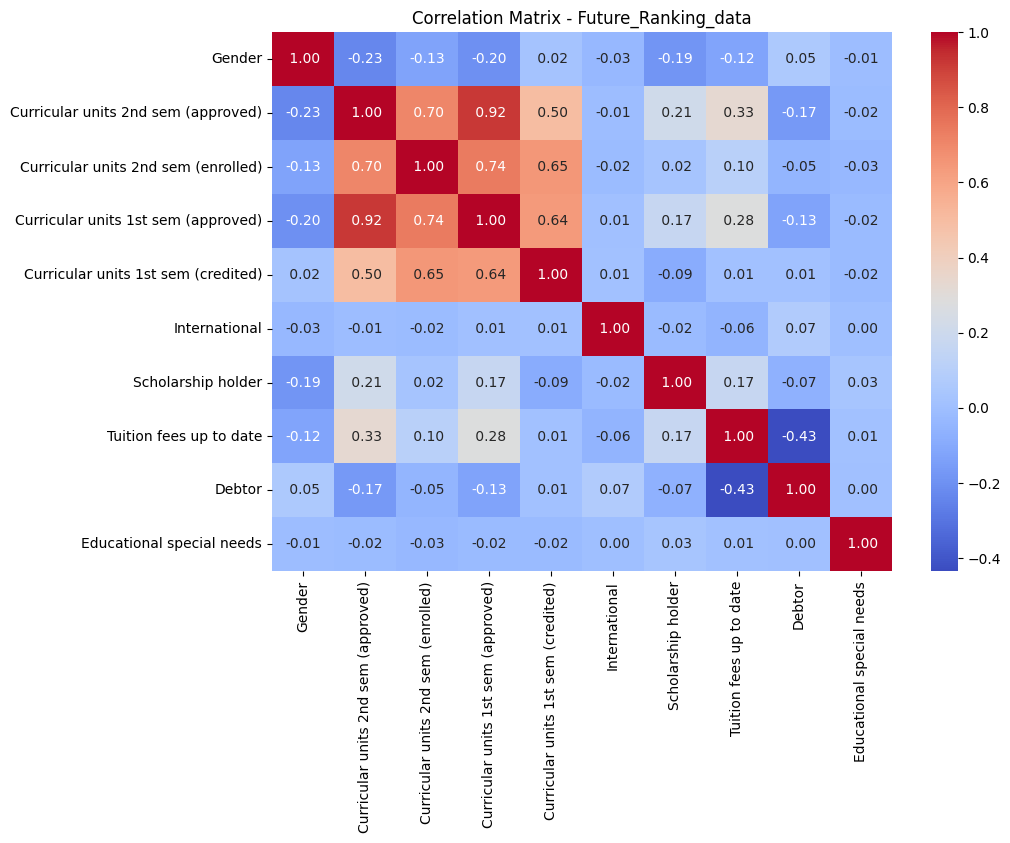

In [ ]:
# Correlation Matrix for Future Ranking data
plt.figure(figsize=(10,7))
sns.heatmap(Future_Ranking_data.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix - Future_Ranking_data')
plt.show()

<p align="justify">The number of credits earned per semester (credited, enrolled, approved, etc.) show a high positive correlation with each other. This may suggest that students complete and earn credits for the courses they register for, which in turn affects their evaluations and grades. For example, the correlation between 'Curricular units 2nd sem (enrolled)' and 'Curricular units 2nd sem (approved)' is very strong, indicating that many students are passing the courses for which they are registered. Variables related to financial status (e.g., 'Tuition fees up to date' and 'Debtor') are also correlated, indicating that students who are late in paying their tuition fees are often in debt. Data such as this may help to understand student academic success and risk factors, and provide insight for universities to plan student support programs and intervention strategies.</p>

In [ ]:
# Identify features with a ranking of 10 or higher
non_top_features = feature_ranking[feature_ranking['Ranking'] > 10]
print(non_top_features)

                                   Feature  Ranking
1                         Application mode       21
2                        Application order       12
3                                   Course       27
5                   Previous qualification       17
6           Previous qualification (grade)       26
7                              Nationality       14
8                   Mother's qualification       23
9                   Father's qualification       22
10                     Mother's occupation       19
11                     Father's occupation       24
12                         Admission grade       25
19                       Age at enrollment       13
23  Curricular units 1st sem (evaluations)       20
29  Curricular units 2nd sem (evaluations)       16
33                       Unemployment rate       11
34                          Inflation rate       15
35                                     GDP       18


In [ ]:
# Add the Features with a ranking of 10 or higher as identified above to the list of features to be removed
features_removed = []

# Then, add the 'Application mode' feature to the list
features_removed.append('Application mode')

features_removed.extend([
    'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nationality',
    'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (evaluations)',
     'Curricular units 2nd sem (evaluations)', 'Unemployment rate',
     'Inflation rate', 'GDP'
])

print(features_removed)

['Application mode', 'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nationality', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [ ]:
#List after deletion
df.drop(columns=features_removed, inplace=True)
df.head()

,Marital status,Daytime/evening attendance\t,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,1,19,12,5,9,1,0,0,1,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,Dropout
1,1,1,1,3,3,3,1,0,0,0,1,0,0,0,6,6,14.000000,0,0,6,6,13.666667,0,Graduate
2,1,1,37,37,9,9,1,0,0,0,1,0,0,0,6,0,0.000000,0,0,6,0,0.000000,0,Dropout
3,1,1,38,37,5,3,1,0,0,1,0,0,0,0,6,6,13.428571,0,0,6,5,12.400000,0,Graduate
4,2,0,37,38,9,9,0,0,0,1,0,0,0,0,6,5,12.333333,0,0,6,6,13.000000,0,Graduate


In [ ]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

**B.Modeling**

The code shows a code snippet for converting a target variable into numeric form and a data table.



In [ ]:
# Converting Target Variable into Numeric Form

encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Marital status,Daytime/evening attendance\t,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,1,19,12,5,9,1,0,0,1,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0,0
1,1,1,1,3,3,3,1,0,0,0,1,0,0,0,6,6,14.000000,0,0,6,6,13.666667,0,1
2,1,1,37,37,9,9,1,0,0,0,1,0,0,0,6,0,0.000000,0,0,6,0,0.000000,0,0
3,1,1,38,37,5,3,1,0,0,1,0,0,0,0,6,6,13.428571,0,0,6,5,12.400000,0,1
4,2,0,37,38,9,9,0,0,0,1,0,0,0,0,6,5,12.333333,0,0,6,6,13.000000,0,1


In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

**C.Feature Scaling**

This section demonstrates how to use the MinMaxScaler from the preprocessing module to scale the features of the dataset X. The MinMaxScaler is fitted and then used to transform the features.

In [ ]:
# Use the MinMaxScaler on the X data
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

**D.Train-Test Split**

The code snippet shows how to split the dataset into training and testing sets using the train_test_split function from scikit-learn. The function takes the features X, target variable y, test size, and random state as parameters.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**E. Hyper Parameter Tuning**

This part defines a function called grid_search that performs a grid search over different hyperparameter combinations for a given model. The function takes the model, parameter grid, scoring metric, number of jobs, and verbosity level as inputs and returns the best hyperparameters and score.

In [ ]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
def grid_search(model, folds, params, scoring):
    grid_search = GridSearchCV(model,
                                cv=folds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=1,
                                verbose=1)
    return grid_search

In [ ]:
def print_best_score_params(model):
    print('Best Score: ', model.best_score_)
    print('Best Hyperparameters: ', model.best_params_)

**F. Classification algorithms**

**a. Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_params = {
    'C': [0.01, 1, 10],
    'penalty': ['11', '12', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'saga']

}
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

In [ ]:
grid_search_log.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.01, 1, 10],
                         'penalty': ['11', '12', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'saga']},
             verbose=1)

In [ ]:
print_best_score_params(grid_search_log)

Best Score:  0.909435261707989
Best Hyperparameters:  {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}


In [ ]:
lr = LogisticRegression(C = 0.01, penalty='none', solver='saga')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, penalty='none', solver='saga')

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9104683195592287


**b. Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_params = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30],
}
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

In [ ]:
grid_search_dtc.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 30]},
             scoring='roc_auc_ovr', verbose=1)

In [ ]:
print_best_score_params(grid_search_dtc)

Best Score:  0.9293343730133503
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 30}


In [ ]:
dtc = DecisionTreeClassifier(max_depth= 10, min_samples_leaf=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)

In [ ]:
dtc_y_pred = dtc.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, dtc_y_pred))

Accuracy:  0.8939393939393939


**c. AdaBoost Classifier**

In [ ]:
dtc_ada = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2), n_estimators=5,
        learning_rate=0.5, random_state=42)

dtc_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=5, random_state=42)

In [ ]:


y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost maxdepth=2. Accuracy - training set', round(accuracy_train, 2))
print('AdaBoost maxdepth=2. Accuracy - testing set', round(accuracy_test, 2))

AdaBoost maxdepth=2. Accuracy - training set 0.9
AdaBoost maxdepth=2. Accuracy - testing set 0.89


**d. Bagging Classifier**

In [ ]:
dtc_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=6, max_samples=100, random_state=42) # normal to have 50+ estimators

dtc_bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=6, random_state=42)

In [ ]:
y_train_pred = dtc_bag.predict(X_train)
y_test_pred = dtc_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Bagging. Accuracy - training set', round(accuracy_train, 2))
print('Bagging. Accuracy - testing set', round(accuracy_test, 2))

Bagging. Accuracy - training set 0.87
Bagging. Accuracy - testing set 0.85


In [ ]:
dtc_bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1, max_samples=142, random_state=42) # normal to have 50+ estimators

dtc_bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=142,
                  n_estimators=1, random_state=42)

In [ ]:
dtc_rnd = RandomForestClassifier(n_estimators=6, max_samples=100, random_state=42)

dtc_rnd.fit(X_train, y_train)

y_train_pred = dtc_rnd.predict(X_train)
y_test_pred = dtc_rnd.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('RandomForest. Accuracy - training set', round(accuracy_train, 2))
print('RandomForest. Accuracy - testing set', round(accuracy_test, 2))

RandomForest. Accuracy - training set 0.87
RandomForest. Accuracy - testing set 0.86


**e. XGBOOST**

In [ ]:
xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


**f. MLP Classifier**

In [ ]:
X = df.iloc[:, :-1].values  # All columns except the last one are features
y = df.iloc[:, -1].values   # The last column is the target

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize an MLPClassifier with default parameters for demonstration purposes
mlp = MLPClassifier(random_state=42)

# Fit the model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Print performance metrics
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       277
           1       0.89      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726

Accuracy: 0.8898071625344353


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Flexibility and Scalability**

<p align="justify">As Decision Trees do not require data to fit a particular distribution, they are versatile and adaptable to various datasets. Whether our data size expands or contracts in future iterations, the Decision Tree model can be easily adjusted and retrained. Educational data can be messy, with outliers such as exceptionally high or low grades. Decision Trees are less sensitive to outliers, making them a robust choice for our diverse dataset.</p>

**Practical Application**

<p align="justify">From a practical standpoint, Decision Trees are relatively straightforward to implement and do not require heavy computational resources. This makes them a practical choice for educational institutions that might not have access to advanced computing power. The tree structure allows educators and policymakers to easily identify and act upon critical thresholds (like a certain grade or attendance rate) that might influence a student’s likelihood to graduate or drop out.</p>

**Conclusion**

<p align="justify">The Decision Tree algorithm emerges as a particularly suitable choice for predicting student graduation or dropout rates, owing to its inherent strengths in handling the diverse and complex nature of the dataset. Its ability to perform feature selection aligns well with the dataset's multifaceted characteristics, including socio-economic indicators and academic performance. The algorithm's simplicity and interpretability are vital advantages, making it accessible to stakeholders in educational settings. Furthermore, its robustness to outliers and non-linear relationships, demonstrated by solid performance metrics (Best Score: 0.9293, Accuracy: 0.8399), ensures that it can effectively capture and illustrate the nuanced decision-making processes typical in educational environments. Therefore, a Decision Tree provides a balanced, understandable, and adaptable model for identifying key factors influencing student outcomes, an essential aspect of academic planning and intervention.</p>